In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Clean Up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
skill_percent = 6
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent']>skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


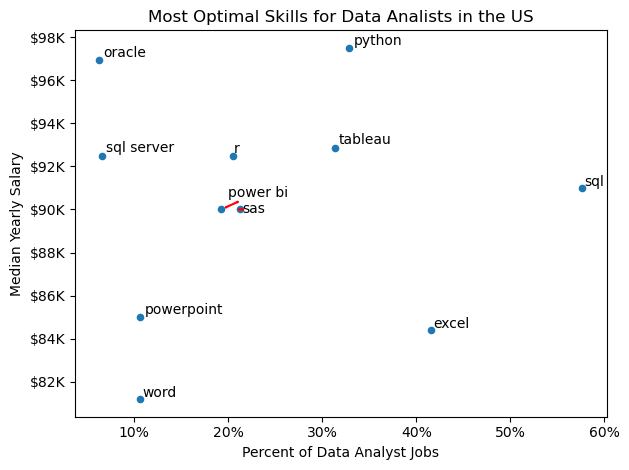

In [12]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary' )
# fig, ax = plt.subplots()
ax = plt.gca()

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index): 
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i], txt ))

adjust_text(texts, arrowprops=dict(arrowstyle="<->", color='r', lw=1.5))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0)) 

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analists in the US')
plt.tight_layout()
plt.show()